# Read Data

In [1]:
import pymongo
import pandas as pd

#konfigurasi koneksi
username = 'hridayanikaruna'
password = 'urpassword'
host = 'claster_host.mongodb.net'
dbname = 'urdb'

# URL koneksi MongoDB Atlas
uri = f"mongodb+srv://{username}:{password}@{host}/{dbname}?retryWrites=true&w=majority"

# koneksi ke server MongoDB
client = pymongo.MongoClient(uri)

if client:
    print("Koneksi berhasil terhubung!")

Koneksi berhasil terhubung!


In [2]:
collection_name = 'ur_collection_name'
db = client[dbname]
collection = db[collection_name]
documents = collection.find()
data = pd.DataFrame(list(documents))
data.head()

,_id,,title,rating,date_of_stay,review,resort_name
0,6465e09a5e043bc11053ea16,0,DO NOT GO HERE,10,May 2023,Absolutely disgusted. Got off our flight and a...,Bali Rich Luxury Villa
1,6465e09a5e043bc11053ea17,1,DIRTIEST HOTEL IN BALI,10,May 2023,STAY AWAY. Please other reviews this place nee...,Bali Rich Luxury Villa
2,6465e09a5e043bc11053ea18,2,Nuclear disaster,10,March 2023,Post apocaliptic experience. Avoid this place ...,Bali Rich Luxury Villa
3,6465e09a5e043bc11053ea19,3,Worst Experience Ever!!!,10,December 2022,"It’s a scam!!!!\n\nToilet choke, power trip, n...",Bali Rich Luxury Villa
4,6465e09a5e043bc11053ea1a,4,Worst experience on holiday in 30 years so tha...,10,December 2022,BALI RICH 'LUXURY' VILLAS IS THE WORST VILLA O...,Bali Rich Luxury Villa


#### Nama 12 Resort

In [3]:
data['resort_name'].value_counts()

The Haven Bali Seminyak                   2402
Primera Hotel Seminyak                    2073
Ramada Encore by Wyndham Seminyak Bali    2073
Pelangi Bali Hotel                        1201
Puri Saron Seminyak                        811
Kanishka Villas                            559
Bali Rich Luxury Villa                     387
Sense Sunset Seminyak                      370
The Alea Hotel Seminyak                    297
Bhavana Private Villas                     235
Paragon Hotel Seminyak                     171
Casa Dasa Boutique Hotel                    73
Name: resort_name, dtype: int64

#### Distribusi Rating

In [4]:
data['rating'].value_counts()

50    4321
40    3538
30    1502
20     659
10     632
Name: rating, dtype: int64

Text(0.5, 1.0, 'Distribusi Rating Resort Seminyak')

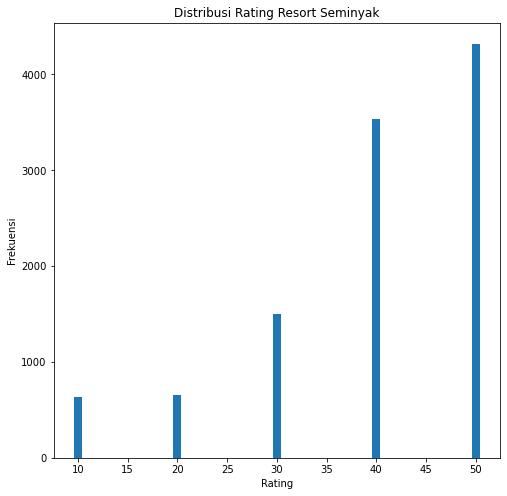

In [5]:
import matplotlib.pyplot as plt
rating = data['rating'].value_counts()
rating = rating.sort_index()
plt.figure(figsize=(8,8))
plt.bar(rating.index, rating.values)
plt.xlabel('Rating')
plt.ylabel('Frekuensi')
plt.title('Distribusi Rating Resort Seminyak')

# PREPROCESSING DATA

## Lowercase

In [6]:
pre_data = data.copy()
pre_data['review'] = pre_data['review'].str.lower()
pre_data.head()

,_id,,title,rating,date_of_stay,review,resort_name
0,6465e09a5e043bc11053ea16,0,DO NOT GO HERE,10,May 2023,absolutely disgusted. got off our flight and a...,Bali Rich Luxury Villa
1,6465e09a5e043bc11053ea17,1,DIRTIEST HOTEL IN BALI,10,May 2023,stay away. please other reviews this place nee...,Bali Rich Luxury Villa
2,6465e09a5e043bc11053ea18,2,Nuclear disaster,10,March 2023,post apocaliptic experience. avoid this place ...,Bali Rich Luxury Villa
3,6465e09a5e043bc11053ea19,3,Worst Experience Ever!!!,10,December 2022,"it’s a scam!!!!\n\ntoilet choke, power trip, n...",Bali Rich Luxury Villa
4,6465e09a5e043bc11053ea1a,4,Worst experience on holiday in 30 years so tha...,10,December 2022,bali rich 'luxury' villas is the worst villa o...,Bali Rich Luxury Villa


## Menghapus Stopword

In [7]:
import nltk
from nltk.corpus import stopwords

stopwords_eng = set(stopwords.words('english'))

In [8]:
def remove_stopwords(text):
    #Membagi teks menjadi kata-kata
    words = text.split()
    #Hapus stopwords
    filtered_words = [word for word in words if word.lower() not in stopwords_eng]
    #Menggabungkan kata-kata yang tersisa menjadi teks kembali
    return ' '.join(filtered_words)  

In [9]:
pre_data['review'] = pre_data['review'].apply(remove_stopwords)
pre_data.head()

,_id,,title,rating,date_of_stay,review,resort_name
0,6465e09a5e043bc11053ea16,0,DO NOT GO HERE,10,May 2023,absolutely disgusted. got flight arrived villa...,Bali Rich Luxury Villa
1,6465e09a5e043bc11053ea17,1,DIRTIEST HOTEL IN BALI,10,May 2023,stay away. please reviews place needs shutting...,Bali Rich Luxury Villa
2,6465e09a5e043bc11053ea18,2,Nuclear disaster,10,March 2023,post apocaliptic experience. avoid place compl...,Bali Rich Luxury Villa
3,6465e09a5e043bc11053ea19,3,Worst Experience Ever!!!,10,December 2022,"it’s scam!!!! toilet choke, power trip, water ...",Bali Rich Luxury Villa
4,6465e09a5e043bc11053ea1a,4,Worst experience on holiday in 30 years so tha...,10,December 2022,bali rich 'luxury' villas worst villa bali! da...,Bali Rich Luxury Villa


## Menghapus URL

In [10]:
import regex as re

pre_data['review'] = pre_data['review'].str.replace(r'http\S+|www.\S+', '', regex=True)

## Menghapus Karakter selain Huruf, Angka, dan Spasi

In [11]:
pre_data['review'] = pre_data['review'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)

## Menghapus Emoticon

In [12]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # simbol
                               u"\U0001F680-\U0001F6FF"  # transportasi
                               u"\U0001F1E0-\U0001F1FF"  # bendera negara
                               u"\U00002702-\U000027B0"  # bintang dan simbol
                               u"\U000024C2-\U0001F251" 
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [13]:
pre_data['review'] = pre_data['review'].apply(remove_emoji)

## Stemming

In [14]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def stemming(x):
    stemming = ' '.join([stemmer.stem(word) for word in x.split()])
    return stemming

pre_data['review'] = pre_data['review'].apply(lambda x: stemming(x))

In [15]:
pre_data.head()

,_id,,title,rating,date_of_stay,review,resort_name
0,6465e09a5e043bc11053ea16,0,DO NOT GO HERE,10,May 2023,absolut disgust got flight arriv villa met rec...,Bali Rich Luxury Villa
1,6465e09a5e043bc11053ea17,1,DIRTIEST HOTEL IN BALI,10,May 2023,stay away pleas review place need shut down to...,Bali Rich Luxury Villa
2,6465e09a5e043bc11053ea18,2,Nuclear disaster,10,March 2023,post apocalipt experi avoid place complet rip ...,Bali Rich Luxury Villa
3,6465e09a5e043bc11053ea19,3,Worst Experience Ever!!!,10,December 2022,it scam toilet choke power trip water heater d...,Bali Rich Luxury Villa
4,6465e09a5e043bc11053ea1a,4,Worst experience on holiday in 30 years so tha...,10,December 2022,bali rich luxuri villa worst villa bali damp m...,Bali Rich Luxury Villa


## Save

pre_data.to_csv('preprocessing_12hotel.csv')

# WORDCLOUD

In [16]:
filename = 'preprocessing_12hotel.csv'
wc_data = pd.read_csv(filename, index_col=0)
wc_data.head()

,_id,Unnamed: 2,title,rating,date_of_stay,review,resort_name
0,6465e09a5e043bc11053ea16,0,DO NOT GO HERE,10,May 2023,absolut disgust got flight arriv villa met rec...,Bali Rich Luxury Villa
1,6465e09a5e043bc11053ea17,1,DIRTIEST HOTEL IN BALI,10,May 2023,stay away pleas review place need shut down to...,Bali Rich Luxury Villa
2,6465e09a5e043bc11053ea18,2,Nuclear disaster,10,March 2023,post apocalipt experi avoid place complet rip ...,Bali Rich Luxury Villa
3,6465e09a5e043bc11053ea19,3,Worst Experience Ever!!!,10,December 2022,it scam toilet choke power trip water heater d...,Bali Rich Luxury Villa
4,6465e09a5e043bc11053ea1a,4,Worst experience on holiday in 30 years so tha...,10,December 2022,bali rich luxuri villa worst villa bali damp m...,Bali Rich Luxury Villa


In [17]:
from sklearn.feature_extraction.text import CountVectorizer

#inisialisasi objek CountVectorizer, yang akan digunakan untuk mengubah teks menjadi representasi bag-of-words.
vectorizer = CountVectorizer()
#Metode build_analyzer() digunakan untuk membangun analyzer yang akan digunakan untuk memecah teks menjadi token.
#Analyzer ini akan digunakan untuk memeriksa apakah teks tidak kosong sebelum melakukan pemrosesan lebih lanjut.
analyzer = vectorizer.build_analyzer()

#fungsi yang akan digunakan untuk menghitung frekuensi kemunculan kata dalam teks.
def wordcounts(s):
    f = {} #Variabel f digunakan untuk menyimpan hasil perhitungan frekuensi kata.
    if analyzer(s): #Pemeriksaan ini memastikan bahwa teks tidak kosong sebelum melakukan pemrosesan lebih lanjut.
        kamus = {} #Variabel kamus digunakan untuk membuat kamus yang akan memetakan indeks kata menjadi kata itu sendiri.
        bow_matrix = vectorizer.fit_transform([s]).toarray() #Langkah ini mengubah teks menjadi vektor representasi bag-of-words menggunakan objek CountVectorizer. Metode fit_transform() digunakan untuk menghasilkan matriks yang mewakili frekuensi kemunculan kata dalam teks.
        voc = vectorizer.vocabulary_ #Variabel vc menyimpan kamus yang memetakan kata ke indeks dalam vektor representasi bag-of-words.
        for k,v in voc.items(): #Melalui loop ini, kita mengisi kamus dengan pasangan indeks-kata.
            kamus[v]=k
        
        #Melalui loop ini, kita mengisi kamus dengan pasangan kata-frekuensi kemunculan kata. enumerate() digunakan untuk mengakses indeks dan elemen dalam matriks bow_matrix.
        for index,i in enumerate(bow_matrix[0]):
            f[kamus[index]] = i
    return  f

# menambahkan kolom baru ke dataframe
wc_data['wordcounts_review'] = wc_data['review'].apply(wordcounts)

In [18]:
wc_data.head()

,_id,Unnamed: 2,title,rating,date_of_stay,review,resort_name,wordcounts_review
0,6465e09a5e043bc11053ea16,0,DO NOT GO HERE,10,May 2023,absolut disgust got flight arriv villa met rec...,Bali Rich Luxury Villa,"{'absolut': 1, 'anoth': 1, 'answer': 1, 'arriv..."
1,6465e09a5e043bc11053ea17,1,DIRTIEST HOTEL IN BALI,10,May 2023,stay away pleas review place need shut down to...,Bali Rich Luxury Villa,"{'again': 1, 'anoth': 1, 'away': 1, 'bad': 1, ..."
2,6465e09a5e043bc11053ea18,2,Nuclear disaster,10,March 2023,post apocalipt experi avoid place complet rip ...,Bali Rich Luxury Villa,"{'apocalipt': 1, 'avoid': 1, 'chemic': 1, 'com..."
3,6465e09a5e043bc11053ea19,3,Worst Experience Ever!!!,10,December 2022,it scam toilet choke power trip water heater d...,Bali Rich Luxury Villa,"{'bathtub': 1, 'bedsheet': 1, 'buy': 1, 'choke..."
4,6465e09a5e043bc11053ea1a,4,Worst experience on holiday in 30 years so tha...,10,December 2022,bali rich luxuri villa worst villa bali damp m...,Bali Rich Luxury Villa,"{'2010': 1, '2018': 2, '40': 1, 'agoda': 4, 'a..."


In [19]:
wc_data['resort_name'].value_counts()

The Haven Bali Seminyak                   2402
Primera Hotel Seminyak                    2073
Ramada Encore by Wyndham Seminyak Bali    2073
Pelangi Bali Hotel                        1201
Puri Saron Seminyak                        811
Kanishka Villas                            559
Bali Rich Luxury Villa                     387
Sense Sunset Seminyak                      370
The Alea Hotel Seminyak                    297
Bhavana Private Villas                     235
Paragon Hotel Seminyak                     171
Casa Dasa Boutique Hotel                    73
Name: resort_name, dtype: int64

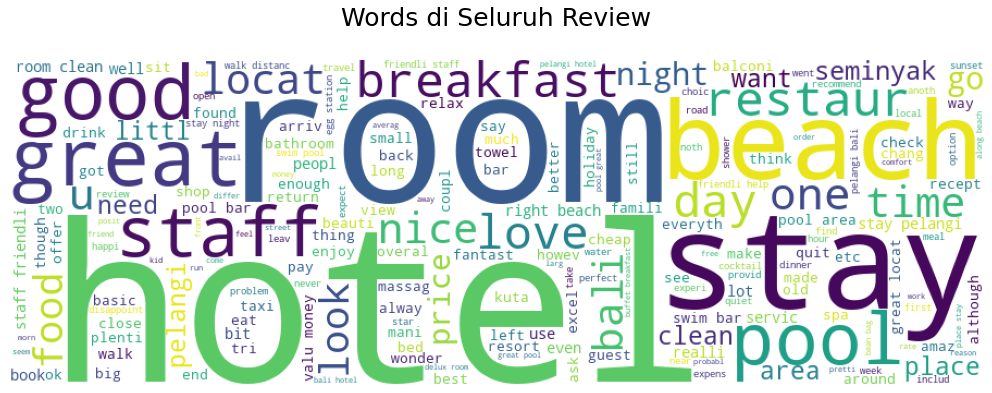

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df_wc = wc_data[wc_data['resort_name'] == 'Pelangi Bali Hotel']
review = df_wc['review']
plt.subplots(figsize=(18,6))
wordcloud = WordCloud(background_color='white', width=900, height=300).generate(" ".join(review))
plt.imshow(wordcloud)
plt.title('Words di Seluruh Review\n',size=25)
plt.axis('off')
plt.show()

---

# MEMBANGUN MODEL SVM, NAIVE BAYES, ID3, C45, K-NN

##### rating 30 tidak dipakai dan hanya ada 2 kelas yaitu positive dan negative

In [21]:
filename = 'preprocessing_12hotel.csv'
data_model = pd.read_csv(filename, index_col=0)
data_model.head()

,_id,Unnamed: 2,title,rating,date_of_stay,review,resort_name
0,6465e09a5e043bc11053ea16,0,DO NOT GO HERE,10,May 2023,absolut disgust got flight arriv villa met rec...,Bali Rich Luxury Villa
1,6465e09a5e043bc11053ea17,1,DIRTIEST HOTEL IN BALI,10,May 2023,stay away pleas review place need shut down to...,Bali Rich Luxury Villa
2,6465e09a5e043bc11053ea18,2,Nuclear disaster,10,March 2023,post apocalipt experi avoid place complet rip ...,Bali Rich Luxury Villa
3,6465e09a5e043bc11053ea19,3,Worst Experience Ever!!!,10,December 2022,it scam toilet choke power trip water heater d...,Bali Rich Luxury Villa
4,6465e09a5e043bc11053ea1a,4,Worst experience on holiday in 30 years so tha...,10,December 2022,bali rich luxuri villa worst villa bali damp m...,Bali Rich Luxury Villa


Text(0.5, 1.0, 'Distribusi Rating Hotel Seminyak')

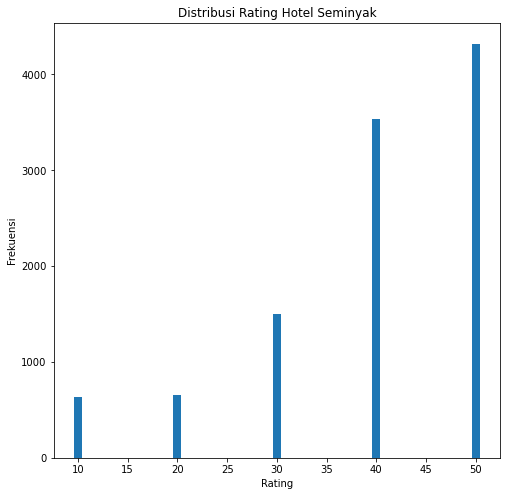

In [22]:
import matplotlib.pyplot as plt
rating = data_model['rating'].value_counts()
rating = rating.sort_index()
plt.figure(figsize=(8,8))
plt.bar(rating.index, rating.values)
plt.xlabel('Rating')
plt.ylabel('Frekuensi')
plt.title('Distribusi Rating Hotel Seminyak')

In [23]:
data[data['rating']==30]

,_id,,title,rating,date_of_stay,review,resort_name
20,6465e09a5e043bc11053ea2a,20,"Okay, but far from 'Luxury'",30,October 2019,We booked a one week stay at Bali Rich in a 'd...,Bali Rich Luxury Villa
34,6465e09a5e043bc11053ea38,34,Average experience,30,April 2019,"Conceptualky was very good, however since we w...",Bali Rich Luxury Villa
35,6465e09a5e043bc11053ea39,35,Bali holiday,30,March 2019,Yeh where do I start about Bali rich villas Se...,Bali Rich Luxury Villa
42,6465e09a5e043bc11053ea40,42,Dated but value for money at discounted rate.,30,February 2019,"Helpful staff, excellent transport. Accommodat...",Bali Rich Luxury Villa
43,6465e09a5e043bc11053ea41,43,Huge private pool villa,30,February 2019,Huge villa with private pool. The room and pre...,Bali Rich Luxury Villa
...,...,...,...,...,...,...,...
10623,646603af5e043bc110541395,2373,Poorly managed restaurant,30,February 2010,"Stayed there for a night, tried to get away fr...",The Haven Bali Seminyak
10635,646603af5e043bc1105413a1,2385,"A bit overprice, very average",30,October 2009,I stayed for 2 nights at the hotel with a frie...,The Haven Bali Seminyak
10641,646603af5e043bc1105413a7,2391,Average Haven,30,September 2009,"As others have mentioned, location is quite go...",The Haven Bali Seminyak
10646,646603af5e043bc1105413ac,2396,"Good location but overpriced, poorly designed,...",30,July 2009,"We are regular visitors to Bali, and often sta...",The Haven Bali Seminyak


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
data_model = data_model[data_model['rating'] != 30]
data_model['Sentiment'] = data_model['rating'] >=40

# data_model['Sentiment'] == 'neutral'
# data_model.loc[data['rating'] >= 30, 'Sentiment'] = 'positive'
# data_model.loc[data['rating'] <= 20, 'Sentiment'] = 'negative'

# split data
train_data,test_data = train_test_split(data_model,train_size=0.8,random_state=43)
X_train = vectorizer.fit_transform(train_data['review'])
y_train = train_data['Sentiment']
X_test = vectorizer.transform(test_data['review'])
y_test = test_data['Sentiment']

Text(0.5, 1.0, 'Distribusi Rating Hotel Seminyak')

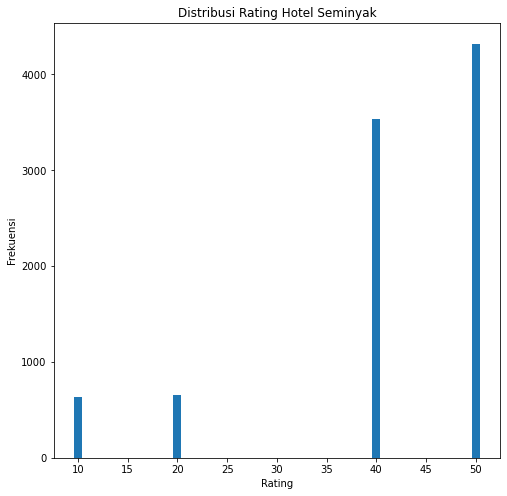

In [25]:
import matplotlib.pyplot as plt
rating = data_model['rating'].value_counts()
rating = rating.sort_index()
plt.figure(figsize=(8,8))
plt.bar(rating.index, rating.values)
plt.xlabel('Rating')
plt.ylabel('Frekuensi')
plt.title('Distribusi Rating Hotel Seminyak')

In [26]:
data_model['rating'].value_counts()

50    4321
40    3538
20     659
10     632
Name: rating, dtype: int64

In [27]:
data_model.tail()

,_id,Unnamed: 2,title,rating,date_of_stay,review,resort_name,Sentiment
10645,646603af5e043bc1105413ab,2395,"We would stay again, even with our dislikes.",40,July 2009,stay 1bed suit toddler rave great travel young...,The Haven Bali Seminyak,True
10648,646603af5e043bc1105413ae,2398,Better places to stay,20,July 2009,place look great initit cut wait get place thi...,The Haven Bali Seminyak,False
10649,646603af5e043bc1105413af,2399,Enjoyed it!,50,April 2009,stay soft open price vey good 95 usd 1bedroom ...,The Haven Bali Seminyak,True
10650,646603af5e043bc1105413b0,2400,new and trendy,50,June 2009,return 2 night stay brand new resortth moment ...,The Haven Bali Seminyak,True
10651,646603af5e043bc1105413b1,2401,"New, Sleek, Sexy, pity about the...",40,May 2009,rat ye big one staff great came investig 11pm ...,The Haven Bali Seminyak,True


### NAIVE BAYES

In [28]:
import datetime as dt
from sklearn.naive_bayes import MultinomialNB

start=dt.datetime.now()
nb = MultinomialNB()
nb.fit(X_train,y_train)
print('Elapsed time: ',str(dt.datetime.now()-start))

Elapsed time:  0:00:00.003745


### SVM

In [29]:
from sklearn.svm import SVC

# Membuat objek SVM
svm = SVC()

# Melatih model SVM
start = dt.datetime.now()
svm.fit(X_train, y_train)
print('Elapsed time: ', str(dt.datetime.now()-start))

Elapsed time:  0:00:09.435647


### ID3 (Decision Tree)

In [30]:
from sklearn.tree import DecisionTreeClassifier

# Membuat objek Decision Tree (ID3)
id3 = DecisionTreeClassifier(criterion='entropy')

# Melatih model ID3
start = dt.datetime.now()
id3.fit(X_train, y_train)
print('Elapsed time: ', str(dt.datetime.now()-start))

Elapsed time:  0:00:00.689295


### C4.5 (Decision Tree)

In [33]:
c45 = DecisionTreeClassifier(criterion='gini')

# Melatih model ID3
start = dt.datetime.now()
c45.fit(X_train, y_train)
print('Elapsed time: ', str(dt.datetime.now()-start))

Elapsed time:  0:00:01.316113


### K-NN (K-Nearest Neighbors)

In [34]:
from sklearn.neighbors import KNeighborsClassifier

# Membuat objek K-NN
knn = KNeighborsClassifier()

# Melatih model K-NN
start = dt.datetime.now()
knn.fit(X_train, y_train)
print('Elapsed time: ', str(dt.datetime.now()-start))

Elapsed time:  0:00:00.007204


## ROC Curves dan AUC Biner Class

In [35]:
from sklearn.metrics import roc_curve, auc
import seaborn as sns

pred_nb = nb.predict_proba(X_test)[:,1]
fpr_nb,tpr_nb,_ = roc_curve(y_test.values,pred_nb)
roc_auc_nb = auc(fpr_nb,tpr_nb)

pred_svm = svm.decision_function(X_test)
fpr_svm,tpr_svm,_ = roc_curve(y_test.values,pred_svm)
roc_auc_svm = auc(fpr_svm,tpr_svm)

pred_id3 = id3.predict_proba(X_test)[:, 1]
fpr_id3, tpr_id3, _ = roc_curve(y_test.values, pred_id3)
roc_auc_id3 = auc(fpr_id3, tpr_id3)

pred_c45 = c45.predict_proba(X_test)[:, 1]
fpr_c45, tpr_c45, _ = roc_curve(y_test.values, pred_c45)
roc_auc_c45 = auc(fpr_c45, tpr_c45)

pred_knn = knn.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test.values, pred_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

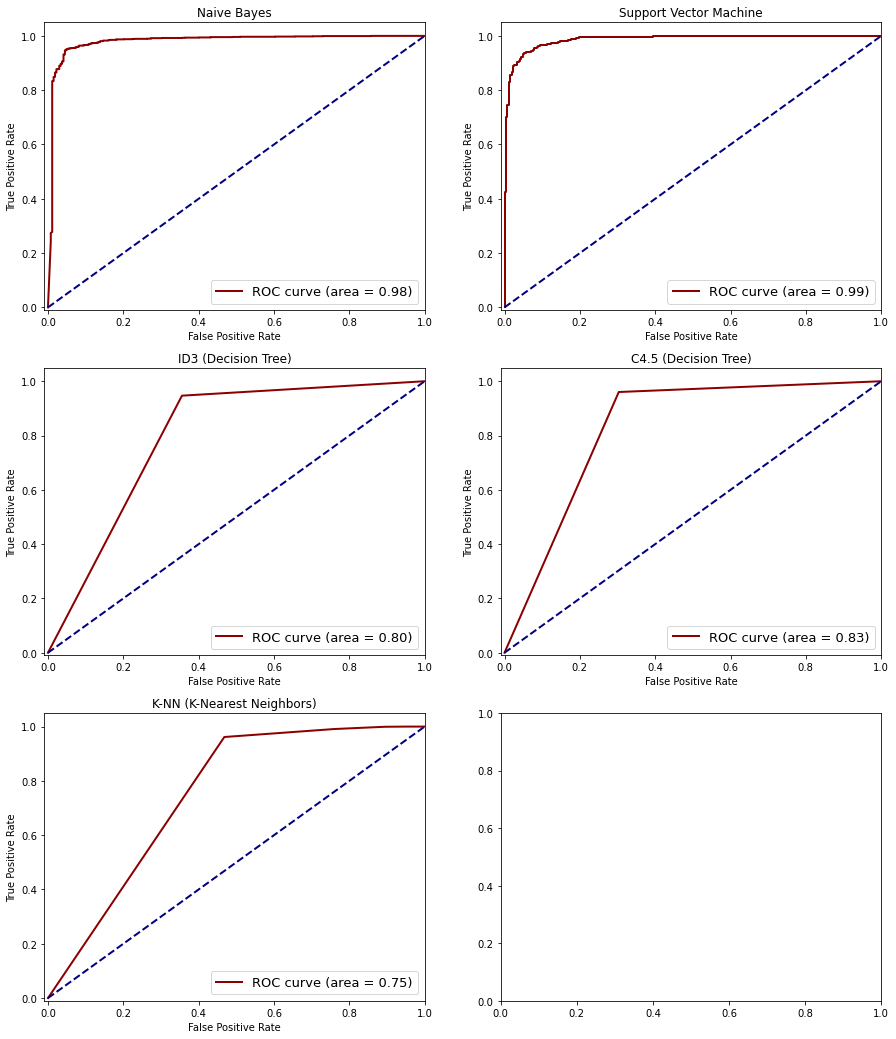

In [36]:
import matplotlib.pyplot as plt
f, axes = plt.subplots(3, 2,figsize=(15,18))
axes[0, 0].plot(fpr_nb, tpr_nb, color='darkred', lw=2, label='ROC curve (area = {:0.2f})'.format(roc_auc_nb))
axes[0, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0, 0].set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes[0, 0].set(xlabel='False Positive Rate', ylabel='True Positive Rate', title='Naive Bayes')
axes[0, 0].legend(loc='lower right', fontsize=13)

axes[0, 1].plot(fpr_svm, tpr_svm, color='darkred', lw=2, label='ROC curve (area = {:0.2f})'.format(roc_auc_svm))
axes[0, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0, 1].set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes[0, 1].set(xlabel='False Positive Rate', ylabel='True Positive Rate', title='Support Vector Machine')
axes[0, 1].legend(loc='lower right', fontsize=13)

axes[1, 0].plot(fpr_id3, tpr_id3, color='darkred', lw=2, label='ROC curve (area = {:0.2f})'.format(roc_auc_id3))
axes[1, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1, 0].set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes[1, 0].set(xlabel='False Positive Rate', ylabel='True Positive Rate', title='ID3 (Decision Tree)')
axes[1, 0].legend(loc='lower right', fontsize=13)

axes[1, 1].plot(fpr_c45, tpr_c45, color='darkred', lw=2, label='ROC curve (area = {:0.2f})'.format(roc_auc_c45))
axes[1, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1, 1].set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes[1, 1].set(xlabel='False Positive Rate', ylabel='True Positive Rate', title='C4.5 (Decision Tree)')
axes[1, 1].legend(loc='lower right', fontsize=13)

axes[2, 0].plot(fpr_knn, tpr_knn, color='darkred', lw=2, label='ROC curve (area = {:0.2f})'.format(roc_auc_knn))
axes[2, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[2, 0].set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes[2, 0].set(xlabel='False Positive Rate', ylabel='True Positive Rate', title='K-NN (K-Nearest Neighbors)')
axes[2, 0].legend(loc='lower right', fontsize=13)

## Confusion Matrix

/Users/nimadehridayanikaruna/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


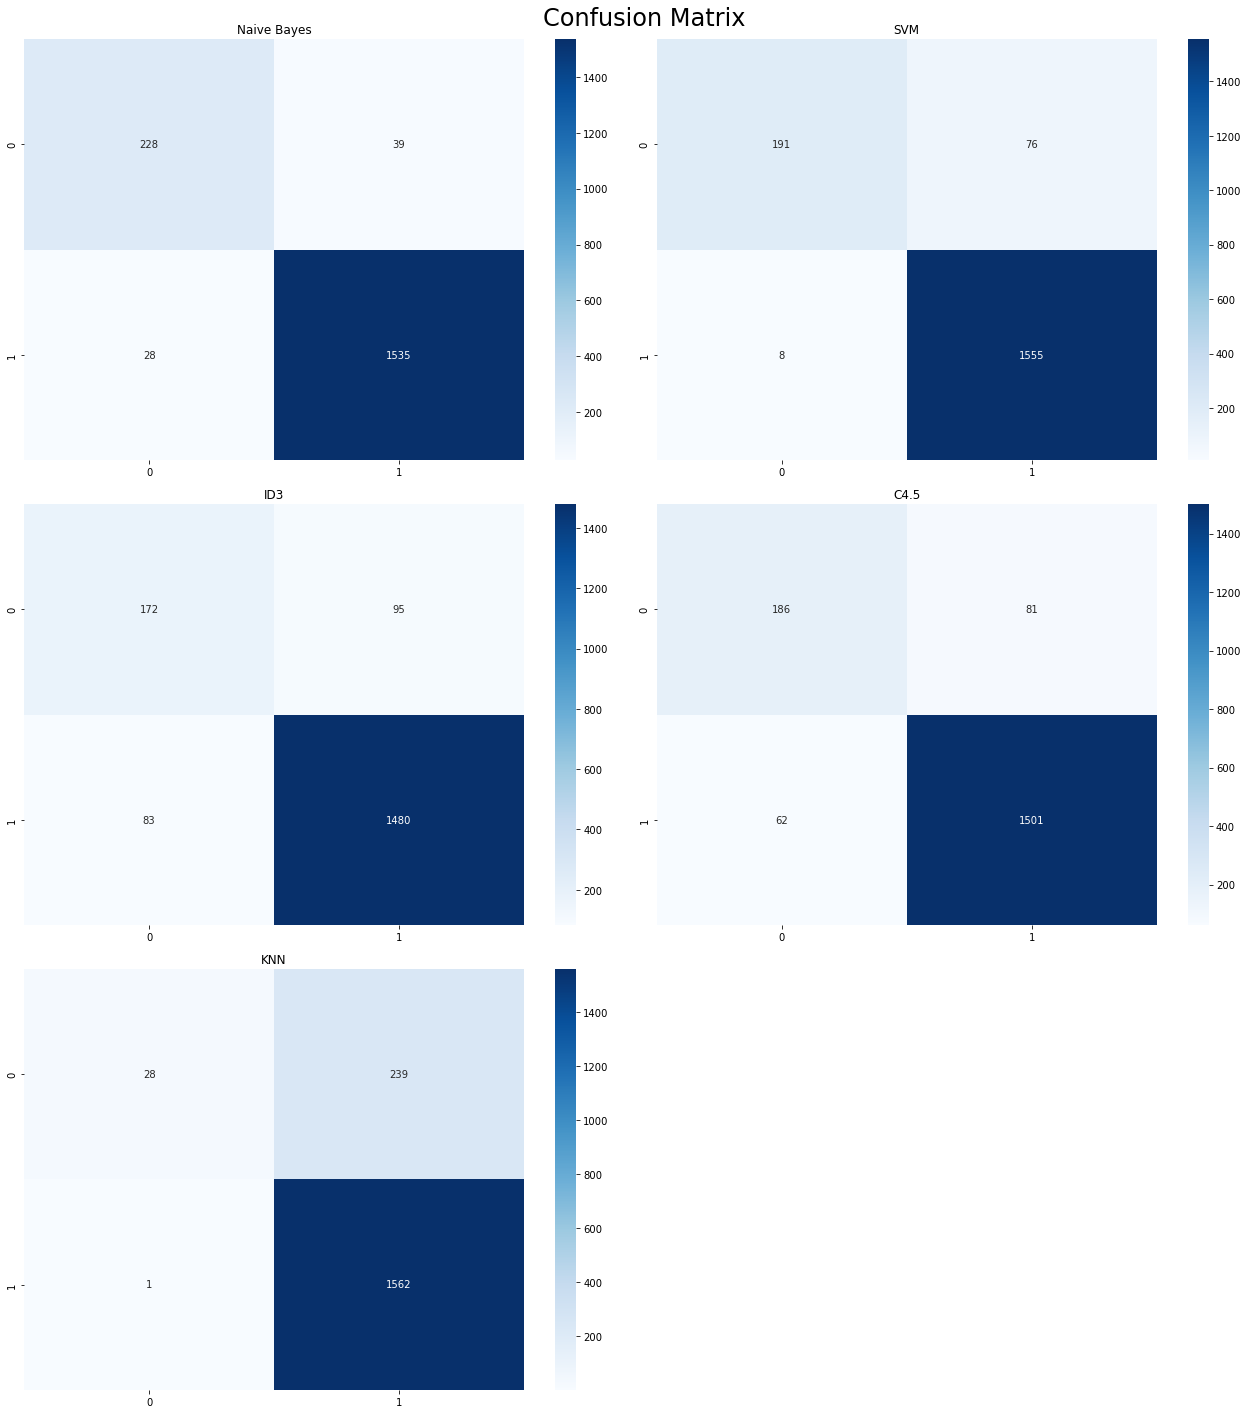

In [37]:
from sklearn.metrics import confusion_matrix
nb_cm = confusion_matrix(y_test.values, nb.predict(X_test))
svm_cm = confusion_matrix(y_test.values, svm.predict(X_test))
id3_cm = confusion_matrix(y_test.values, id3.predict(X_test))
c45_cm = confusion_matrix(y_test.values, c45.predict(X_test))
knn_cm = confusion_matrix(y_test.values, knn.predict(X_test))

plt.figure(figsize=(18, 20))
plt.suptitle("Confusion Matrix", fontsize=24)

plt.subplot(3, 2, 1)
plt.title("Naive Bayes")
sns.heatmap(nb_cm, annot=True, fmt='', cmap='Blues')

plt.subplot(3, 2, 2)
plt.title("SVM")
sns.heatmap(svm_cm, annot=True, fmt='', cmap='Blues')

plt.subplot(3, 2, 3)
plt.title("ID3")
sns.heatmap(id3_cm, annot=True, fmt='', cmap='Blues')

plt.subplot(3, 2, 4)
plt.title("C4.5")
sns.heatmap(c45_cm, annot=True, fmt='', cmap='Blues')

plt.subplot(3, 2, 5)
plt.title("KNN")
sns.heatmap(knn_cm, annot=True, fmt='', cmap='Blues')
plt.tight_layout()
plt.show()

In [38]:
import sklearn.metrics as mt
print("\n Naive Bayes")
print(mt.classification_report(y_test, nb.predict(X_test)))
print("\n Support Vector Machine (SVM)")
print(mt.classification_report(y_test, svm.predict(X_test)))
print("\n ID3")
print(mt.classification_report(y_test, id3.predict(X_test)))
print("\n C4.5")
print(mt.classification_report(y_test, c45.predict(X_test)))
print("\n K-NN")
print(mt.classification_report(y_test, knn.predict(X_test)))


 Naive Bayes
              precision    recall  f1-score   support

       False       0.89      0.85      0.87       267
        True       0.98      0.98      0.98      1563

    accuracy                           0.96      1830
   macro avg       0.93      0.92      0.93      1830
weighted avg       0.96      0.96      0.96      1830


 Support Vector Machine (SVM)
              precision    recall  f1-score   support

       False       0.96      0.72      0.82       267
        True       0.95      0.99      0.97      1563

    accuracy                           0.95      1830
   macro avg       0.96      0.86      0.90      1830
weighted avg       0.95      0.95      0.95      1830


 ID3
              precision    recall  f1-score   support

       False       0.67      0.64      0.66       267
        True       0.94      0.95      0.94      1563

    accuracy                           0.90      1830
   macro avg       0.81      0.80      0.80      1830
weighted avg       0.90

/Users/nimadehridayanikaruna/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# EVALUASI

##### Naive Bayes paling bagus

---

# MEMBANGUN MODEL Versi 2

##### Membangun model dengan gabungan kolom title review, dan review. Biner Class

In [39]:
data.head()

,_id,,title,rating,date_of_stay,review,resort_name
0,6465e09a5e043bc11053ea16,0,DO NOT GO HERE,10,May 2023,Absolutely disgusted. Got off our flight and a...,Bali Rich Luxury Villa
1,6465e09a5e043bc11053ea17,1,DIRTIEST HOTEL IN BALI,10,May 2023,STAY AWAY. Please other reviews this place nee...,Bali Rich Luxury Villa
2,6465e09a5e043bc11053ea18,2,Nuclear disaster,10,March 2023,Post apocaliptic experience. Avoid this place ...,Bali Rich Luxury Villa
3,6465e09a5e043bc11053ea19,3,Worst Experience Ever!!!,10,December 2022,"It’s a scam!!!!\n\nToilet choke, power trip, n...",Bali Rich Luxury Villa
4,6465e09a5e043bc11053ea1a,4,Worst experience on holiday in 30 years so tha...,10,December 2022,BALI RICH 'LUXURY' VILLAS IS THE WORST VILLA O...,Bali Rich Luxury Villa


# PREPROCESSING

In [40]:
pre_data2 = data.copy()
pre_data2['text'] = pre_data2['title'] + ' ' + pre_data2['review']
pre_data2.head()

,_id,,title,rating,date_of_stay,review,resort_name,text
0,6465e09a5e043bc11053ea16,0,DO NOT GO HERE,10,May 2023,Absolutely disgusted. Got off our flight and a...,Bali Rich Luxury Villa,DO NOT GO HERE Absolutely disgusted. Got off o...
1,6465e09a5e043bc11053ea17,1,DIRTIEST HOTEL IN BALI,10,May 2023,STAY AWAY. Please other reviews this place nee...,Bali Rich Luxury Villa,DIRTIEST HOTEL IN BALI STAY AWAY. Please other...
2,6465e09a5e043bc11053ea18,2,Nuclear disaster,10,March 2023,Post apocaliptic experience. Avoid this place ...,Bali Rich Luxury Villa,Nuclear disaster Post apocaliptic experience. ...
3,6465e09a5e043bc11053ea19,3,Worst Experience Ever!!!,10,December 2022,"It’s a scam!!!!\n\nToilet choke, power trip, n...",Bali Rich Luxury Villa,Worst Experience Ever!!! It’s a scam!!!!\n\nTo...
4,6465e09a5e043bc11053ea1a,4,Worst experience on holiday in 30 years so tha...,10,December 2022,BALI RICH 'LUXURY' VILLAS IS THE WORST VILLA O...,Bali Rich Luxury Villa,Worst experience on holiday in 30 years so tha...


In [41]:
#lowercase
pre_data2['text'] = pre_data2['text'].str.lower()
#menghapus URL
pre_data2['text'] = pre_data2['text'].str.replace(r'http\S+|www.\S+', '', regex=True)
#menghapus karakter
pre_data2['text'] = pre_data2['text'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)
#menghapus emoticon
pre_data2['text'] = pre_data2['text'].apply(remove_emoji)
#menghapus stopwords
pre_data2['text'] = pre_data2['text'].apply(remove_stopwords)
#stemming
pre_data2['text'] = pre_data2['text'].apply(lambda x: stemming(x))

In [42]:
pre_data2.head()

,_id,,title,rating,date_of_stay,review,resort_name,text
0,6465e09a5e043bc11053ea16,0,DO NOT GO HERE,10,May 2023,Absolutely disgusted. Got off our flight and a...,Bali Rich Luxury Villa,do not go here absolut disgust got off our fli...
1,6465e09a5e043bc11053ea17,1,DIRTIEST HOTEL IN BALI,10,May 2023,STAY AWAY. Please other reviews this place nee...,Bali Rich Luxury Villa,dirtiest hotel in bali stay away pleas other r...
2,6465e09a5e043bc11053ea18,2,Nuclear disaster,10,March 2023,Post apocaliptic experience. Avoid this place ...,Bali Rich Luxury Villa,nuclear disast post apocalipt experi avoid thi...
3,6465e09a5e043bc11053ea19,3,Worst Experience Ever!!!,10,December 2022,"It’s a scam!!!!\n\nToilet choke, power trip, n...",Bali Rich Luxury Villa,worst experi ever it a scam toilet choke power...
4,6465e09a5e043bc11053ea1a,4,Worst experience on holiday in 30 years so tha...,10,December 2022,BALI RICH 'LUXURY' VILLAS IS THE WORST VILLA O...,Bali Rich Luxury Villa,worst experi on holiday in 30 year so thank yo...


## Save

pre_data2.to_csv('preprocessing_12hotel_2.csv')

# MODEL BINER CLASS

##### Model ada 2 kelas yaitu positive dan negatif dimana review dengan rating 30 tidak dipakai dalam membangun model

In [90]:
filename = 'preprocessing_12hotel_2.csv'
pd.set_option('display.max_colwidth', 50) 
data_model2 = pd.read_csv(filename, index_col=0)
data_model2.head()

,_id,Unnamed: 2,title,rating,date_of_stay,review,resort_name,text
0,6465e09a5e043bc11053ea16,0,DO NOT GO HERE,10,May 2023,Absolutely disgusted. Got off our flight and a...,Bali Rich Luxury Villa,do not go here absolut disgust got off our fli...
1,6465e09a5e043bc11053ea17,1,DIRTIEST HOTEL IN BALI,10,May 2023,STAY AWAY. Please other reviews this place nee...,Bali Rich Luxury Villa,dirtiest hotel in bali stay away pleas other r...
2,6465e09a5e043bc11053ea18,2,Nuclear disaster,10,March 2023,Post apocaliptic experience. Avoid this place ...,Bali Rich Luxury Villa,nuclear disast post apocalipt experi avoid thi...
3,6465e09a5e043bc11053ea19,3,Worst Experience Ever!!!,10,December 2022,"It’s a scam!!!!\n\nToilet choke, power trip, n...",Bali Rich Luxury Villa,worst experi ever it a scam toilet choke power...
4,6465e09a5e043bc11053ea1a,4,Worst experience on holiday in 30 years so tha...,10,December 2022,BALI RICH 'LUXURY' VILLAS IS THE WORST VILLA O...,Bali Rich Luxury Villa,worst experi on holiday in 30 year so thank yo...


In [91]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
data_model2 = data_model2[data_model2['rating'] != 30]
data_model2['Sentiment'] = data_model2['rating'] >=40

# split data
train_data,test_data = train_test_split(data_model2,train_size=0.8,random_state=43)
X_train = vectorizer.fit_transform(train_data['text'])
y_train = train_data['Sentiment']
X_test = vectorizer.transform(test_data['text'])
y_test = test_data['Sentiment']

In [92]:
pd.set_option('display.max_colwidth', 50) 
data_model2.tail()

,_id,Unnamed: 2,title,rating,date_of_stay,review,resort_name,text,Sentiment
10645,646603af5e043bc1105413ab,2395,"We would stay again, even with our dislikes.",40,July 2009,We stayed in a 1-bed suite with a toddler.\n\n...,The Haven Bali Seminyak,we would stay again even with our dislik we st...,True
10648,646603af5e043bc1105413ae,2398,Better places to stay,20,July 2009,This place looked great inititally but just di...,The Haven Bali Seminyak,better place to stay thi place look great init...,False
10649,646603af5e043bc1105413af,2399,Enjoyed it!,50,April 2009,We stayed there while soft opening - so the pr...,The Haven Bali Seminyak,enjoy it we stay there while soft open so the ...,True
10650,646603af5e043bc1105413b0,2400,new and trendy,50,June 2009,i have just returned from 2 nights stay at thi...,The Haven Bali Seminyak,new and trendi i have just return from 2 night...,True
10651,646603af5e043bc1105413b1,2401,"New, Sleek, Sexy, pity about the...",40,May 2009,"Rat. Yes a big one, BUT staff were great, came...",The Haven Bali Seminyak,new sleek sexi piti about the rat ye a big one...,True


## Naive Bayes

In [93]:
import datetime as dt
from sklearn.naive_bayes import MultinomialNB

start=dt.datetime.now()
nb = MultinomialNB()
nb.fit(X_train,y_train)
print('Elapsed time: ',str(dt.datetime.now()-start))

Elapsed time:  0:00:00.016731


## SVM

In [94]:
from sklearn.svm import SVC

# Membuat objek SVM
svm = SVC()

# Melatih model SVM
start = dt.datetime.now()
svm.fit(X_train, y_train)
print('Elapsed time: ', str(dt.datetime.now()-start))

Elapsed time:  0:00:11.752656


## ID3

In [95]:
from sklearn.tree import DecisionTreeClassifier

# Membuat objek Decision Tree (ID3)
id3 = DecisionTreeClassifier(criterion='entropy')

# Melatih model ID3
start = dt.datetime.now()
id3.fit(X_train, y_train)
print('Elapsed time: ', str(dt.datetime.now()-start))

Elapsed time:  0:00:00.819189


## C4.5

In [96]:
c45 = DecisionTreeClassifier(criterion='gini')

# Melatih model ID3
start = dt.datetime.now()
c45.fit(X_train, y_train)
print('Elapsed time: ', str(dt.datetime.now()-start))

Elapsed time:  0:00:01.312505


## K-NN

In [97]:
from sklearn.neighbors import KNeighborsClassifier

# Membuat objek K-NN
knn = KNeighborsClassifier()

# Melatih model K-NN
start = dt.datetime.now()
knn.fit(X_train, y_train)
print('Elapsed time: ', str(dt.datetime.now()-start))

Elapsed time:  0:00:00.004877


## ROC dan AUC

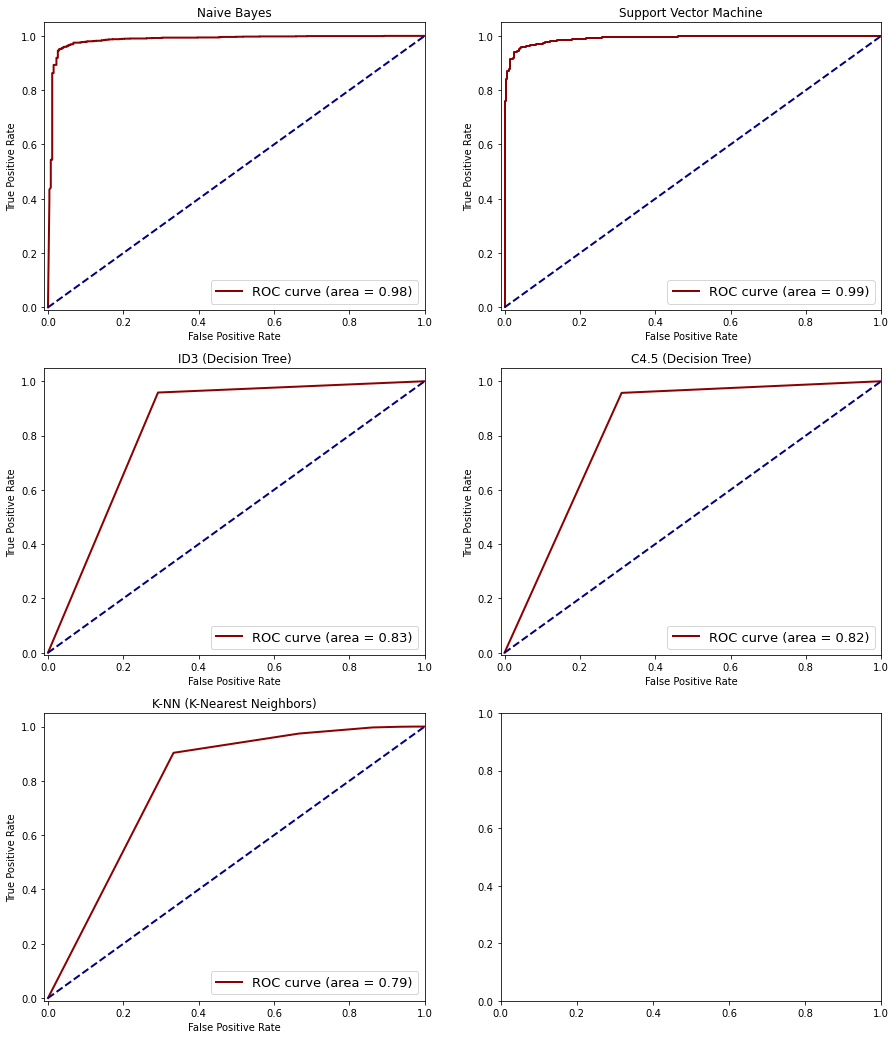

In [98]:
from sklearn.metrics import roc_curve, auc
import seaborn as sns

pred_nb = nb.predict_proba(X_test)[:,1]
fpr_nb,tpr_nb,_ = roc_curve(y_test.values,pred_nb)
roc_auc_nb = auc(fpr_nb,tpr_nb)

pred_svm = svm.decision_function(X_test)
fpr_svm,tpr_svm,_ = roc_curve(y_test.values,pred_svm)
roc_auc_svm = auc(fpr_svm,tpr_svm)

pred_id3 = id3.predict_proba(X_test)[:, 1]
fpr_id3, tpr_id3, _ = roc_curve(y_test.values, pred_id3)
roc_auc_id3 = auc(fpr_id3, tpr_id3)

pred_c45 = c45.predict_proba(X_test)[:, 1]
fpr_c45, tpr_c45, _ = roc_curve(y_test.values, pred_c45)
roc_auc_c45 = auc(fpr_c45, tpr_c45)

pred_knn = knn.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test.values, pred_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

import matplotlib.pyplot as plt
f, axes = plt.subplots(3, 2,figsize=(15,18))
axes[0, 0].plot(fpr_nb, tpr_nb, color='darkred', lw=2, label='ROC curve (area = {:0.2f})'.format(roc_auc_nb))
axes[0, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0, 0].set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes[0, 0].set(xlabel='False Positive Rate', ylabel='True Positive Rate', title='Naive Bayes')
axes[0, 0].legend(loc='lower right', fontsize=13)

axes[0, 1].plot(fpr_svm, tpr_svm, color='darkred', lw=2, label='ROC curve (area = {:0.2f})'.format(roc_auc_svm))
axes[0, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0, 1].set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes[0, 1].set(xlabel='False Positive Rate', ylabel='True Positive Rate', title='Support Vector Machine')
axes[0, 1].legend(loc='lower right', fontsize=13)

axes[1, 0].plot(fpr_id3, tpr_id3, color='darkred', lw=2, label='ROC curve (area = {:0.2f})'.format(roc_auc_id3))
axes[1, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1, 0].set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes[1, 0].set(xlabel='False Positive Rate', ylabel='True Positive Rate', title='ID3 (Decision Tree)')
axes[1, 0].legend(loc='lower right', fontsize=13)

axes[1, 1].plot(fpr_c45, tpr_c45, color='darkred', lw=2, label='ROC curve (area = {:0.2f})'.format(roc_auc_c45))
axes[1, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1, 1].set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes[1, 1].set(xlabel='False Positive Rate', ylabel='True Positive Rate', title='C4.5 (Decision Tree)')
axes[1, 1].legend(loc='lower right', fontsize=13)

axes[2, 0].plot(fpr_knn, tpr_knn, color='darkred', lw=2, label='ROC curve (area = {:0.2f})'.format(roc_auc_knn))
axes[2, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[2, 0].set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes[2, 0].set(xlabel='False Positive Rate', ylabel='True Positive Rate', title='K-NN (K-Nearest Neighbors)')
axes[2, 0].legend(loc='lower right', fontsize=13)

/Users/nimadehridayanikaruna/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


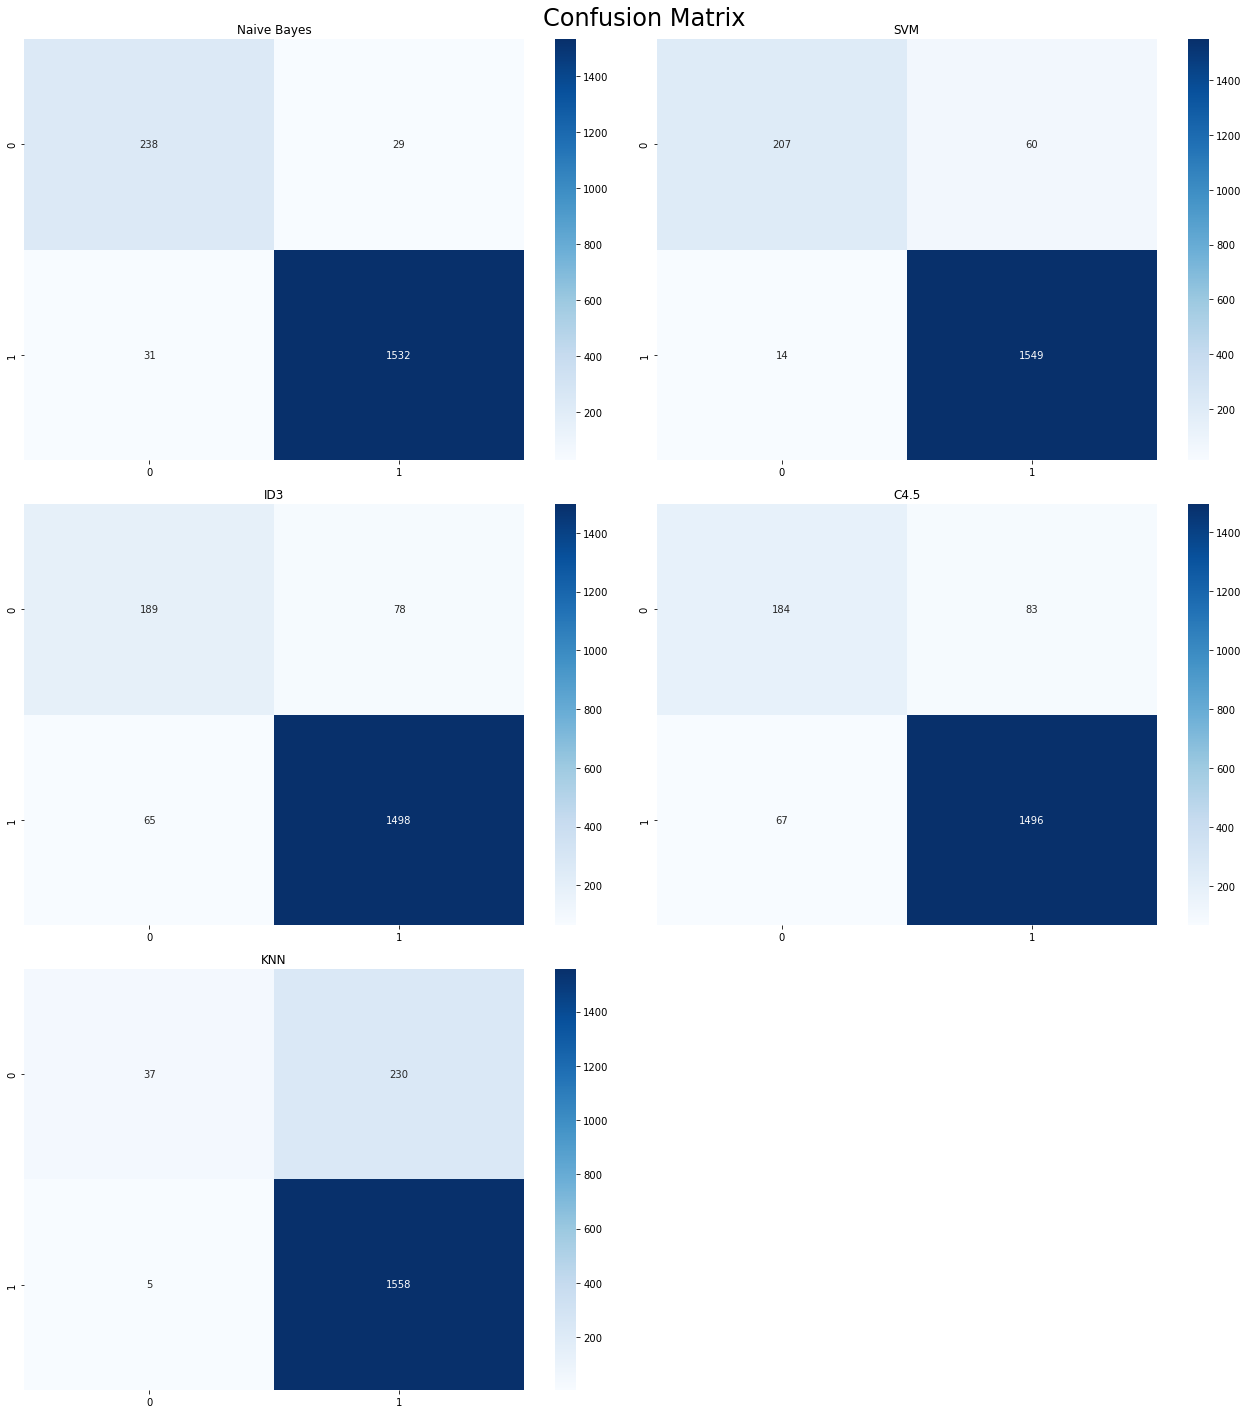

In [99]:
from sklearn.metrics import confusion_matrix
nb_cm = confusion_matrix(y_test.values, nb.predict(X_test))
svm_cm = confusion_matrix(y_test.values, svm.predict(X_test))
id3_cm = confusion_matrix(y_test.values, id3.predict(X_test))
c45_cm = confusion_matrix(y_test.values, c45.predict(X_test))
knn_cm = confusion_matrix(y_test.values, knn.predict(X_test))

plt.figure(figsize=(18, 20))
plt.suptitle("Confusion Matrix", fontsize=24)

plt.subplot(3, 2, 1)
plt.title("Naive Bayes")
sns.heatmap(nb_cm, annot=True, fmt='', cmap='Blues')

plt.subplot(3, 2, 2)
plt.title("SVM")
sns.heatmap(svm_cm, annot=True, fmt='', cmap='Blues')

plt.subplot(3, 2, 3)
plt.title("ID3")
sns.heatmap(id3_cm, annot=True, fmt='', cmap='Blues')

plt.subplot(3, 2, 4)
plt.title("C4.5")
sns.heatmap(c45_cm, annot=True, fmt='', cmap='Blues')

plt.subplot(3, 2, 5)
plt.title("KNN")
sns.heatmap(knn_cm, annot=True, fmt='', cmap='Blues')
plt.tight_layout()
plt.show()

In [100]:
import sklearn.metrics as mt
print("\n Naive Bayes")
print(mt.classification_report(y_test, nb.predict(X_test)))
print("\n Support Vector Machine (SVM)")
print(mt.classification_report(y_test, svm.predict(X_test)))
print("\n ID3")
print(mt.classification_report(y_test, id3.predict(X_test)))
print("\n C4.5")
print(mt.classification_report(y_test, c45.predict(X_test)))
print("\n K-NN")
print(mt.classification_report(y_test, knn.predict(X_test)))


 Naive Bayes
              precision    recall  f1-score   support

       False       0.88      0.89      0.89       267
        True       0.98      0.98      0.98      1563

    accuracy                           0.97      1830
   macro avg       0.93      0.94      0.93      1830
weighted avg       0.97      0.97      0.97      1830


 Support Vector Machine (SVM)
              precision    recall  f1-score   support

       False       0.94      0.78      0.85       267
        True       0.96      0.99      0.98      1563

    accuracy                           0.96      1830
   macro avg       0.95      0.88      0.91      1830
weighted avg       0.96      0.96      0.96      1830


 ID3
              precision    recall  f1-score   support

       False       0.74      0.71      0.73       267
        True       0.95      0.96      0.95      1563

    accuracy                           0.92      1830
   macro avg       0.85      0.83      0.84      1830
weighted avg       0.92

/Users/nimadehridayanikaruna/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# Data Tanpa Label

In [101]:
filename_tl = 'MeliaBaliNusaDua.csv'
pd.set_option('display.max_colwidth', 50) 
data_tl = pd.read_csv(filename_tl, index_col=0)
data_tl.head()

,title,rating,date_of_stay,review
0,Average experience for the hotel rating and price,30,April 2023,We stayed for 6 nights with 2 young children. ...
1,Amazing resort with some of the most friendly ...,50,November 2022,"We stayed at Malia Bali for 7 nights, and the ..."
2,I had an amazing stay at Meliā Resort,50,April 2023,I don’t know how to explain how much of an inc...
3,Paradise,50,April 2023,From the moment we arrived with a sign meeting...
4,A beautiful resort in gorgeous Nusa Dua,40,April 2023,First off I will say this resort is really bea...


### Cek Persebaran Rating

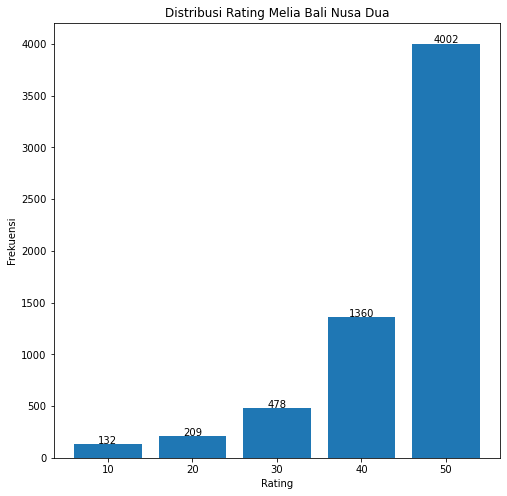

In [116]:
import matplotlib.pyplot as plt

rating_counts = data_tl['rating'].value_counts().sort_index()

plt.figure(figsize=(8, 8))
plt.bar(rating_counts.index.astype(str), rating_counts.values)
plt.xlabel('Rating')
plt.ylabel('Frekuensi')
plt.title('Distribusi Rating Melia Bali Nusa Dua')

# Menampilkan nilai di atas setiap batang diagram
for i, count in enumerate(rating_counts):
    plt.text(i, count + 5, str(count), ha='center')

plt.show()


In [104]:
predict_data = data_tl.copy()
pd.set_option('display.max_colwidth', 50) 
predict_data['text'] = predict_data['title'] + ' ' + predict_data['review']
predict_data.head()

,title,rating,date_of_stay,review,text
0,Average experience for the hotel rating and price,30,April 2023,We stayed for 6 nights with 2 young children. ...,Average experience for the hotel rating and pr...
1,Amazing resort with some of the most friendly ...,50,November 2022,"We stayed at Malia Bali for 7 nights, and the ...",Amazing resort with some of the most friendly ...
2,I had an amazing stay at Meliā Resort,50,April 2023,I don’t know how to explain how much of an inc...,I had an amazing stay at Meliā Resort I don’t ...
3,Paradise,50,April 2023,From the moment we arrived with a sign meeting...,Paradise From the moment we arrived with a sig...
4,A beautiful resort in gorgeous Nusa Dua,40,April 2023,First off I will say this resort is really bea...,A beautiful resort in gorgeous Nusa Dua First ...


In [105]:
X_test_tanpalabel = vectorizer.transform(predict_data['text'])
nb_pred = nb.predict(X_test_tanpalabel)
predict_data['Sentiment'] = nb_pred
pd.set_option('display.max_colwidth', 50) 
predict_data.head()

,title,rating,date_of_stay,review,text,Sentiment
0,Average experience for the hotel rating and price,30,April 2023,We stayed for 6 nights with 2 young children. ...,Average experience for the hotel rating and pr...,True
1,Amazing resort with some of the most friendly ...,50,November 2022,"We stayed at Malia Bali for 7 nights, and the ...",Amazing resort with some of the most friendly ...,True
2,I had an amazing stay at Meliā Resort,50,April 2023,I don’t know how to explain how much of an inc...,I had an amazing stay at Meliā Resort I don’t ...,True
3,Paradise,50,April 2023,From the moment we arrived with a sign meeting...,Paradise From the moment we arrived with a sig...,True
4,A beautiful resort in gorgeous Nusa Dua,40,April 2023,First off I will say this resort is really bea...,A beautiful resort in gorgeous Nusa Dua First ...,True


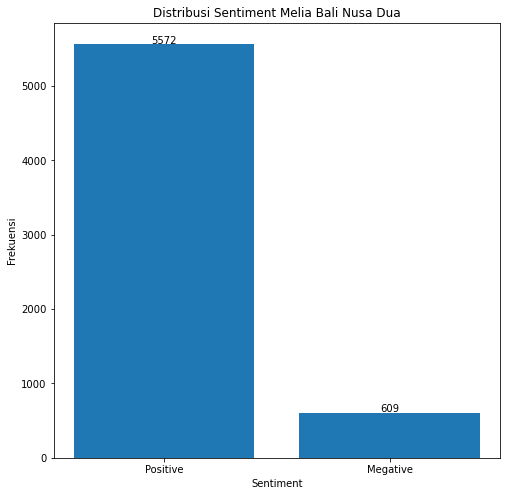

In [112]:
import matplotlib.pyplot as plt

sentiment = predict_data['Sentiment'].value_counts()
sentiment_labels = [ 'Positive','Megative']  # Daftar label untuk masing-masing sentiment

plt.figure(figsize=(8, 8))
plt.bar(sentiment_labels, sentiment)
plt.xlabel('Sentiment')
plt.ylabel('Frekuensi')
plt.title('Distribusi Sentiment Melia Bali Nusa Dua')
# Menampilkan nilai di atas setiap batang diagram
for i, count in enumerate(sentiment_counts):
    plt.text(i, count + 5, str(count), ha='center')

plt.show()


In [42]:
pd.set_option('display.max_colwidth', None) 
predict_data[predict_data['rating']==30]

title  \
0                                                Average experience for the hotel rating and price   
27                                                                   An honest and critical review   
44                                                                        B is for Beautiful staff   
90                                               I believe there better places to stay in the area   
157   The Melia Bali is a 5 star hotel in a state of increasing decay - literally and figuratively   
...                                                                                            ...   
6145                                                           Beautiful Hotel but very damp room!   
6148                                                                                    Not For Us   
6151                                                                 lovely hotel let down by damp   
6170                                            Nice but expensive hotel, shame about the location   
6176                                                                                  Not sure....   

      rating    date_of_stay  \
0         30      April 2023   
27        30      April 2023   
44        30      March 2023   
90        30   February 2023   
157       30    January 2023   
...      ...             ...   
6145      30       July 2006   
6148      30        May 2006   
6151      30  September 2005   
6170      30     August 2005   
6176      30      April 2005   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

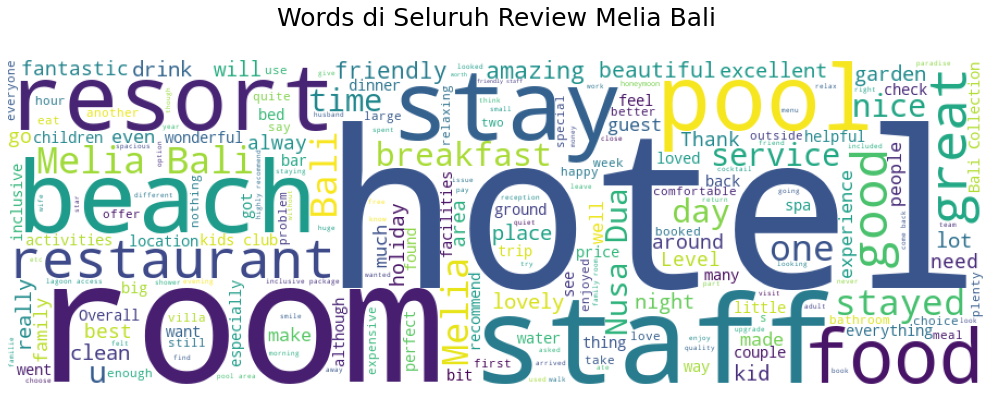

In [117]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

review = predict_data['text']
plt.subplots(figsize=(18,6))
wordcloud_melia = WordCloud(background_color='white', width=900, height=300).generate(" ".join(review))
plt.imshow(wordcloud_melia)
plt.title('Words di Seluruh Review Melia Bali\n',size=25)
plt.axis('off')
plt.show()

# TREND

In [119]:
predict_data['date_of_stay'] = pd.to_datetime(predict_data['date_of_stay'], format='%B %Y')
predict_data.head()

,title,rating,date_of_stay,review,text,Sentiment
0,Average experience for the hotel rating and price,30,2023-04-01,We stayed for 6 nights with 2 young children. ...,Average experience for the hotel rating and pr...,True
1,Amazing resort with some of the most friendly ...,50,2022-11-01,"We stayed at Malia Bali for 7 nights, and the ...",Amazing resort with some of the most friendly ...,True
2,I had an amazing stay at Meliā Resort,50,2023-04-01,I don’t know how to explain how much of an inc...,I had an amazing stay at Meliā Resort I don’t ...,True
3,Paradise,50,2023-04-01,From the moment we arrived with a sign meeting...,Paradise From the moment we arrived with a sig...,True
4,A beautiful resort in gorgeous Nusa Dua,40,2023-04-01,First off I will say this resort is really bea...,A beautiful resort in gorgeous Nusa Dua First ...,True


In [120]:
predict_data['Tahun'] = predict_data['date_of_stay'].dt.year
predict_data['Bulan'] = predict_data['date_of_stay'].dt.month

In [121]:
data_2022 = predict_data[predict_data['Tahun'] == 2022]
sentiment_count = data_2022.groupby('Bulan')['Sentiment'].value_counts().unstack().fillna(0)

In [122]:
predict_data.head()

,title,rating,date_of_stay,review,text,Sentiment,Tahun,Bulan
0,Average experience for the hotel rating and price,30,2023-04-01,We stayed for 6 nights with 2 young children. ...,Average experience for the hotel rating and pr...,True,2023.0,4.0
1,Amazing resort with some of the most friendly ...,50,2022-11-01,"We stayed at Malia Bali for 7 nights, and the ...",Amazing resort with some of the most friendly ...,True,2022.0,11.0
2,I had an amazing stay at Meliā Resort,50,2023-04-01,I don’t know how to explain how much of an inc...,I had an amazing stay at Meliā Resort I don’t ...,True,2023.0,4.0
3,Paradise,50,2023-04-01,From the moment we arrived with a sign meeting...,Paradise From the moment we arrived with a sig...,True,2023.0,4.0
4,A beautiful resort in gorgeous Nusa Dua,40,2023-04-01,First off I will say this resort is really bea...,A beautiful resort in gorgeous Nusa Dua First ...,True,2023.0,4.0


In [123]:
data_2022['Tahun'] = data_2022['Tahun'].astype(int)
data_2022['Bulan'] = data_2022['Bulan'].astype(int)

/var/folders/wr/0tfr5ly55n1cdyd6g4nr418r0000gn/T/ipykernel_35841/3648834612.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2022['Tahun'] = data_2022['Tahun'].astype(int)
/var/folders/wr/0tfr5ly55n1cdyd6g4nr418r0000gn/T/ipykernel_35841/3648834612.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2022['Bulan'] = data_2022['Bulan'].astype(int)


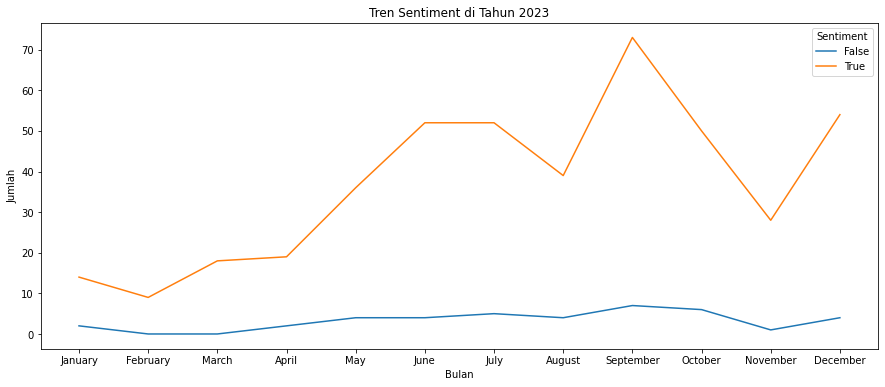

In [126]:
import calendar
sentiment_count = data_2022.groupby('Bulan')['Sentiment'].value_counts().unstack().fillna(0)
sentiment_count.plot(kind='line', figsize=(15, 6))
plt.xticks(sentiment_count.index, [calendar.month_name[i] for i in sentiment_count.index])

plt.xlabel('Bulan')
plt.ylabel('Jumlah')
plt.title('Tren Sentiment di Tahun 2023')
plt.legend(title='Sentiment')
plt.show()

In [127]:
data_2022['Sentiment'].value_counts()

True     444
False     39
Name: Sentiment, dtype: int64

# MODEL MULTICLASS

In [54]:
filename = 'preprocessing_12hotel_2.csv'
data_model3 = pd.read_csv(filename, index_col=0)
data_model3.head()

,_id,Unnamed: 2,title,rating,date_of_stay,review,resort_name,text
0,6465e09a5e043bc11053ea16,0,DO NOT GO HERE,10,May 2023,Absolutely disgusted. Got off our flight and a...,Bali Rich Luxury Villa,do not go here absolut disgust got off our fli...
1,6465e09a5e043bc11053ea17,1,DIRTIEST HOTEL IN BALI,10,May 2023,STAY AWAY. Please other reviews this place nee...,Bali Rich Luxury Villa,dirtiest hotel in bali stay away pleas other r...
2,6465e09a5e043bc11053ea18,2,Nuclear disaster,10,March 2023,Post apocaliptic experience. Avoid this place ...,Bali Rich Luxury Villa,nuclear disast post apocalipt experi avoid thi...
3,6465e09a5e043bc11053ea19,3,Worst Experience Ever!!!,10,December 2022,"It’s a scam!!!!\n\nToilet choke, power trip, n...",Bali Rich Luxury Villa,worst experi ever it a scam toilet choke power...
4,6465e09a5e043bc11053ea1a,4,Worst experience on holiday in 30 years so tha...,10,December 2022,BALI RICH 'LUXURY' VILLAS IS THE WORST VILLA O...,Bali Rich Luxury Villa,worst experi on holiday in 30 year so thank yo...


In [55]:
data_model3['Sentiment'] = 0  
data_model3.loc[data_model3['rating'] >= 40, 'Sentiment'] = 1  
data_model3.loc[data_model3['rating'] <= 20, 'Sentiment'] = -1 

# split data
train_data,test_data = train_test_split(data_model3,train_size=0.8,random_state=43)
X_train = vectorizer.fit_transform(train_data['text'])
y_train = train_data['Sentiment']
X_test = vectorizer.transform(test_data['text'])
y_test = test_data['Sentiment']

In [56]:
data_model3.tail()

,_id,Unnamed: 2,title,rating,date_of_stay,review,resort_name,text,Sentiment
10647,646603af5e043bc1105413ad,2397,Great rooms pool in shade all day long,30,July 2009,these rooms were huge kitchen in the middle wi...,The Haven Bali Seminyak,great room pool in shade all day long these ro...,0
10648,646603af5e043bc1105413ae,2398,Better places to stay,20,July 2009,This place looked great inititally but just di...,The Haven Bali Seminyak,better place to stay thi place look great init...,-1
10649,646603af5e043bc1105413af,2399,Enjoyed it!,50,April 2009,We stayed there while soft opening - so the pr...,The Haven Bali Seminyak,enjoy it we stay there while soft open so the ...,1
10650,646603af5e043bc1105413b0,2400,new and trendy,50,June 2009,i have just returned from 2 nights stay at thi...,The Haven Bali Seminyak,new and trendi i have just return from 2 night...,1
10651,646603af5e043bc1105413b1,2401,"New, Sleek, Sexy, pity about the...",40,May 2009,"Rat. Yes a big one, BUT staff were great, came...",The Haven Bali Seminyak,new sleek sexi piti about the rat ye a big one...,1


## Naive Bayes

In [57]:
import datetime as dt
from sklearn.naive_bayes import MultinomialNB

start=dt.datetime.now()
nb = MultinomialNB()
nb.fit(X_train,y_train)
print('Elapsed time: ',str(dt.datetime.now()-start))

Elapsed time:  0:00:00.018785


## SVM

In [58]:
from sklearn.svm import SVC

# Membuat objek SVM
svm = SVC()

# Melatih model SVM
start = dt.datetime.now()
svm.fit(X_train, y_train)
print('Elapsed time: ', str(dt.datetime.now()-start))

Elapsed time:  0:00:31.980720


## ID3

In [59]:
from sklearn.tree import DecisionTreeClassifier

# Membuat objek Decision Tree (ID3)
id3 = DecisionTreeClassifier(criterion='entropy')

# Melatih model ID3
start = dt.datetime.now()
id3.fit(X_train, y_train)
print('Elapsed time: ', str(dt.datetime.now()-start))

Elapsed time:  0:00:02.148592


## C4.5

In [60]:
c45 = DecisionTreeClassifier(criterion='gini')

# Melatih model ID3
start = dt.datetime.now()
c45.fit(X_train, y_train)
print('Elapsed time: ', str(dt.datetime.now()-start))

Elapsed time:  0:00:03.330690


## K-NN

In [61]:
from sklearn.neighbors import KNeighborsClassifier

# Membuat objek K-NN
knn = KNeighborsClassifier()

# Melatih model K-NN
start = dt.datetime.now()
knn.fit(X_train, y_train)
print('Elapsed time: ', str(dt.datetime.now()-start))

Elapsed time:  0:00:00.002147


## Confusion Matrix

In [70]:
from sklearn.metrics import confusion_matrix
nb_cm = confusion_matrix(y_test.values, nb.predict(X_test))
svm_cm = confusion_matrix(y_test.values, svm.predict(X_test))
id3_cm = confusion_matrix(y_test.values, id3.predict(X_test))
c45_cm = confusion_matrix(y_test.values, c45.predict(X_test))
knn_cm = confusion_matrix(y_test.values, knn.predict(X_test))

/Users/nimadehridayanikaruna/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


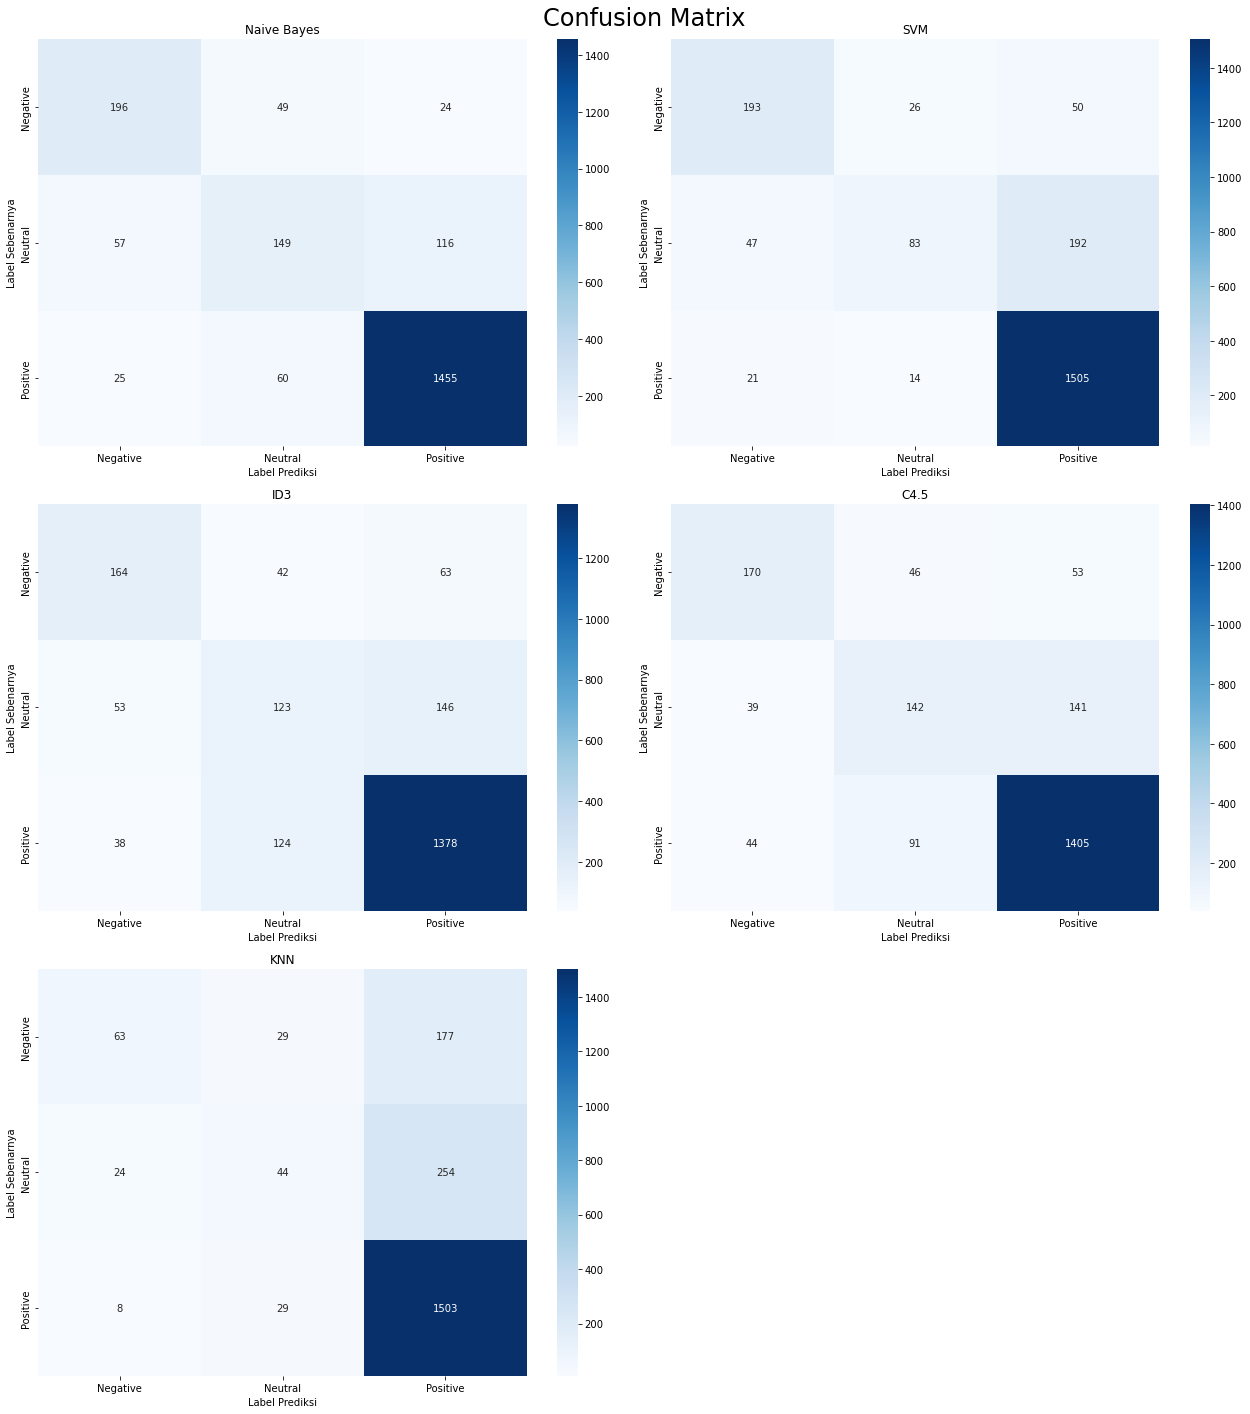

In [71]:
plt.figure(figsize=(18, 20))
plt.suptitle("Confusion Matrix", fontsize=24)

plt.subplot(3, 2, 1)
plt.title("Naive Bayes")
sns.heatmap(nb_cm, annot=True, fmt='', cmap='Blues')
plt.xlabel('Label Prediksi')
plt.ylabel('Label Sebenarnya')
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=['Negative', 'Neutral', 'Positive'])
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=['Negative', 'Neutral', 'Positive'])

plt.subplot(3, 2, 2)
plt.title("SVM")
sns.heatmap(svm_cm, annot=True, fmt='', cmap='Blues')
plt.xlabel('Label Prediksi')
plt.ylabel('Label Sebenarnya')
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=['Negative', 'Neutral', 'Positive'])
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=['Negative', 'Neutral', 'Positive'])

plt.subplot(3, 2, 3)
plt.title("ID3")
sns.heatmap(id3_cm, annot=True, fmt='', cmap='Blues')
plt.xlabel('Label Prediksi')
plt.ylabel('Label Sebenarnya')
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=['Negative', 'Neutral', 'Positive'])
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=['Negative', 'Neutral', 'Positive'])

plt.subplot(3, 2, 4)
plt.title("C4.5")
sns.heatmap(c45_cm, annot=True, fmt='', cmap='Blues')
plt.xlabel('Label Prediksi')
plt.ylabel('Label Sebenarnya')
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=['Negative', 'Neutral', 'Positive'])
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=['Negative', 'Neutral', 'Positive'])

plt.subplot(3, 2, 5)
plt.title("KNN")
sns.heatmap(knn_cm, annot=True, fmt='', cmap='Blues')
plt.xlabel('Label Prediksi')
plt.ylabel('Label Sebenarnya')
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=['Negative', 'Neutral', 'Positive'])
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=['Negative', 'Neutral', 'Positive'])

plt.tight_layout()
plt.show()

In [72]:
import sklearn.metrics as mt
print("\n Naive Bayes")
print(mt.classification_report(y_test, nb.predict(X_test)))
print("\n Support Vector Machine (SVM)")
print(mt.classification_report(y_test, svm.predict(X_test)))
print("\n ID3")
print(mt.classification_report(y_test, id3.predict(X_test)))
print("\n C4.5")
print(mt.classification_report(y_test, c45.predict(X_test)))
print("\n K-NN")
print(mt.classification_report(y_test, knn.predict(X_test)))


 Naive Bayes
              precision    recall  f1-score   support

          -1       0.71      0.73      0.72       269
           0       0.58      0.46      0.51       322
           1       0.91      0.94      0.93      1540

    accuracy                           0.84      2131
   macro avg       0.73      0.71      0.72      2131
weighted avg       0.84      0.84      0.84      2131


 Support Vector Machine (SVM)
              precision    recall  f1-score   support

          -1       0.74      0.72      0.73       269
           0       0.67      0.26      0.37       322
           1       0.86      0.98      0.92      1540

    accuracy                           0.84      2131
   macro avg       0.76      0.65      0.67      2131
weighted avg       0.82      0.84      0.81      2131


 ID3
              precision    recall  f1-score   support

          -1       0.64      0.61      0.63       269
           0       0.43      0.38      0.40       322
           1       0.87 

/Users/nimadehridayanikaruna/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
